In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dans un premier temps nous allons ouvrir le fichier ```house1_subs_blk1.csv``` afin d'analyser les données de consommation électique.

In [2]:
house1_subs_blk1 = pd.read_csv('house1_subs_blk1.csv')
house1_subs_blk1.head()

,unix_ts,sub,V,f,I,dPF,aPF,P,Q,S,Pt,Qt,St
0,1454832000,1,119.7,60.0,0.0,0.97,0.02,0,0,3,0,0,5
1,1454832000,2,120.0,60.0,0.0,0.96,0.35,1,0,3,2,0,6
2,1454832000,3,119.7,60.0,0.0,0.07,0.00,0,0,1,0,0,2
3,1454832000,4,120.0,60.0,0.0,0.59,0.53,2,2,3,3,4,6
4,1454832000,5,119.7,60.0,0.0,0.99,0.23,0,0,3,1,0,5


Nous allons convertir la colonne ```unix_ts``` en ```datetime```.

In [3]:
house1_subs_blk1['datetime'] = pd.to_datetime(house1_subs_blk1['unix_ts'], unit='s')

Les mesures ont été réalisées sur quelle période de temps ?

In [4]:
print('Première mesure : {}'.format(house1_subs_blk1['datetime'].min()))
print('Durée totale des mesures : {}'.format((house1_subs_blk1['datetime'].max() - house1_subs_blk1['datetime'].min())))

Première mesure : 2016-02-07 08:00:00
Durée totale des mesures : 8 days 23:59:59


Y-a-t-il des dates manquantes dans les mesures ?

In [5]:
# this returns the elements missing, we are hoping to find none
pd.date_range(start = house1_subs_blk1['datetime'].min(), end = house1_subs_blk1['datetime'].max(), freq='d').difference(house1_subs_blk1['datetime'])

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

Y-a-t-il des duplicats ?

In [6]:
house1_subs_blk1.duplicated().any()

False

Y-a-t-il des valeurs nulles / na ?

In [7]:
house1_subs_blk1.isna().any().any()

False

Affichons quelques graphes sur les données de mesures ```V```, ```f```, ```I```, ```dPF```, ```aPF```, ```P```, ```Q```, ```S```, ```Pt```, ```Qt```, ```St``` sur 4 sub tirées aléatoirement pour voir à quoi cela ressemble.

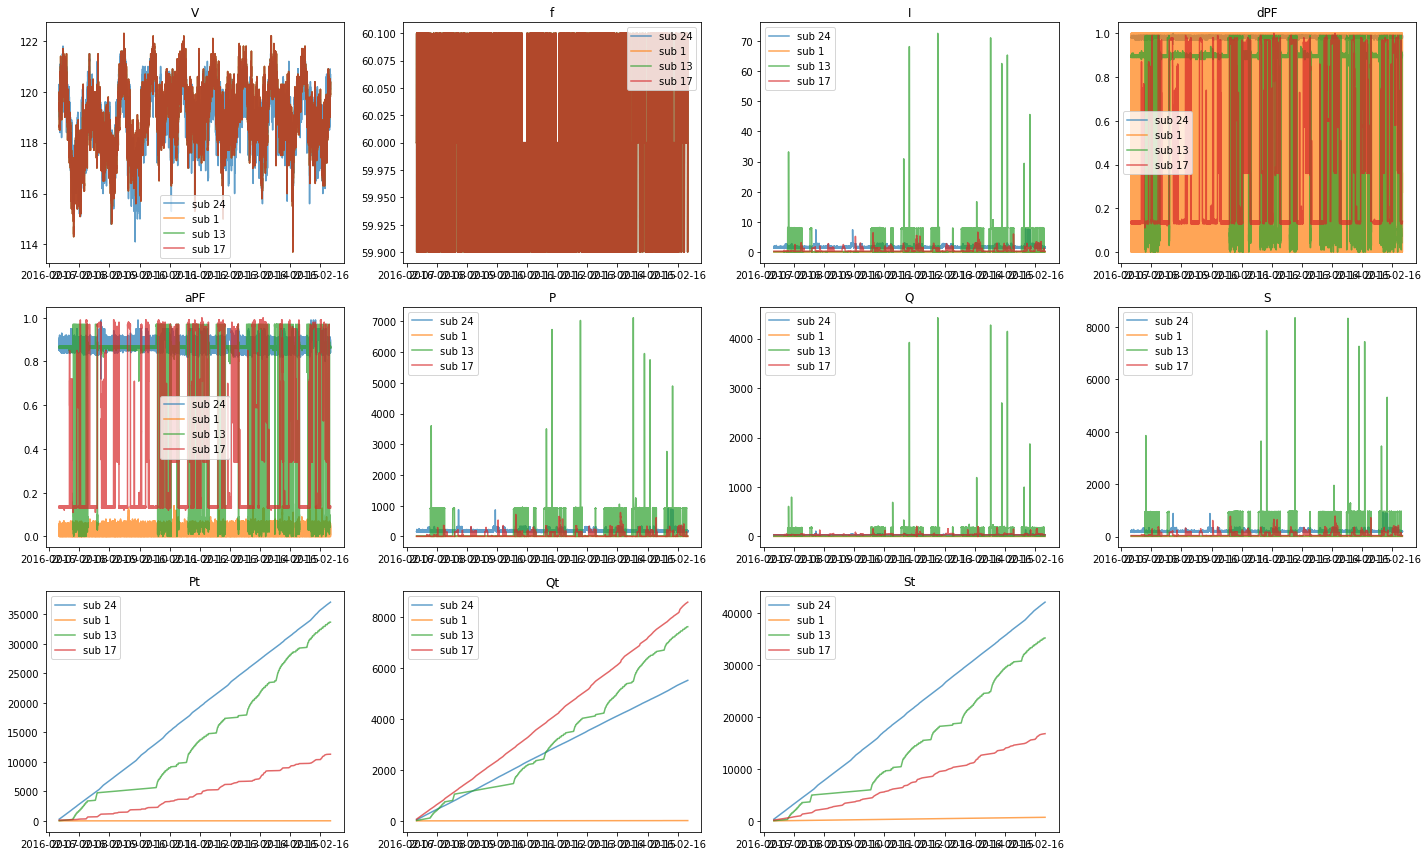

In [8]:
# we prepare our plot
fig = plt.figure(figsize=(20, 12));
fig.autofmt_xdate(rotation=45)

sub = np.random.choice(house1_subs_blk1['sub'].unique(), 4)
columns_graph = ['V', 'f', 'I', 'dPF', 'aPF', 'P', 'Q', 'S', 'Pt', 'Qt', 'St']

# for each column
for k, col in enumerate(columns_graph):
    # we add a subplot
    ax = fig.add_subplot(3, 4, k+1)
    # we plot the categories in each subplot
    for s in sub:
        ax.plot(house1_subs_blk1.loc[house1_subs_blk1['sub'] == s, 'datetime'],
                house1_subs_blk1.loc[house1_subs_blk1['sub'] == s, col],
                label = 'sub ' + str(s), alpha=0.7);
        ax.set_title(col);
    #ax.autoscale(axis='x',tight=True);
    ax.legend();
fig.tight_layout()

Afin de mieux comprendre ces graphes, nous allons faire une agrégation de toutes les sub par heure.

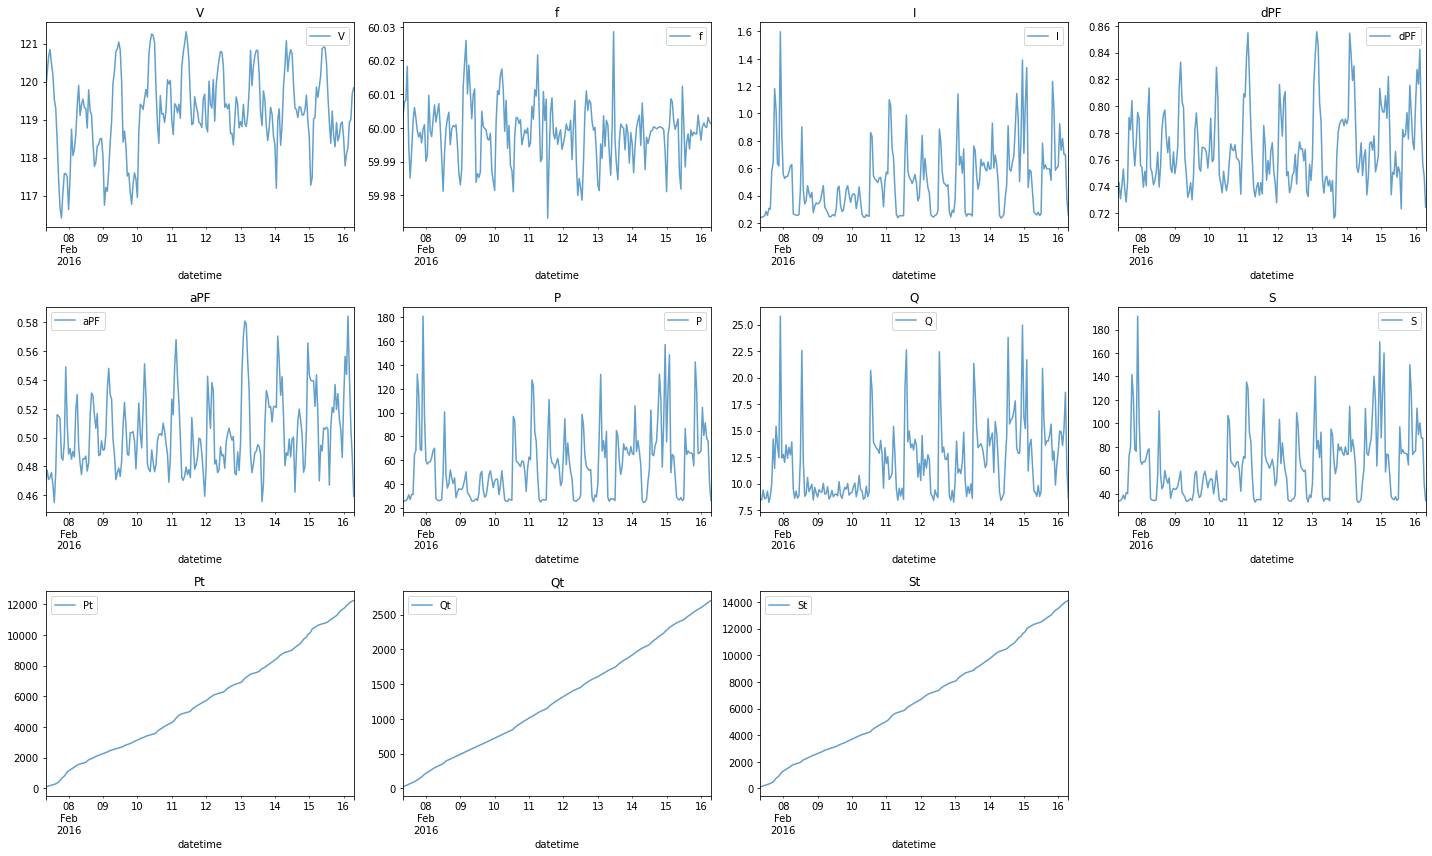

In [9]:
# we prepare our plot
fig = plt.figure(figsize=(20, 12));

columns_graph = ['V', 'f', 'I', 'dPF', 'aPF', 'P', 'Q', 'S', 'Pt', 'Qt', 'St']
data_resampled = house1_subs_blk1.resample(rule='H', on='datetime').mean()[columns_graph].interpolate(method='linear')

# for each column
for k, col in enumerate(columns_graph):
    # we add a subplot
    ax = fig.add_subplot(3, 4, k+1)
    # we plot the categories in each subplot
    data_resampled[col].plot(ax=ax, legend = col, alpha=0.7);
    ax.set_title(col);
    #ax.autoscale(axis='x',tight=True);
    ax.legend();
fig.tight_layout()

Observons maintenant les histogrammes des variables des données agrégées par seconde (somme sur toutes les sub).

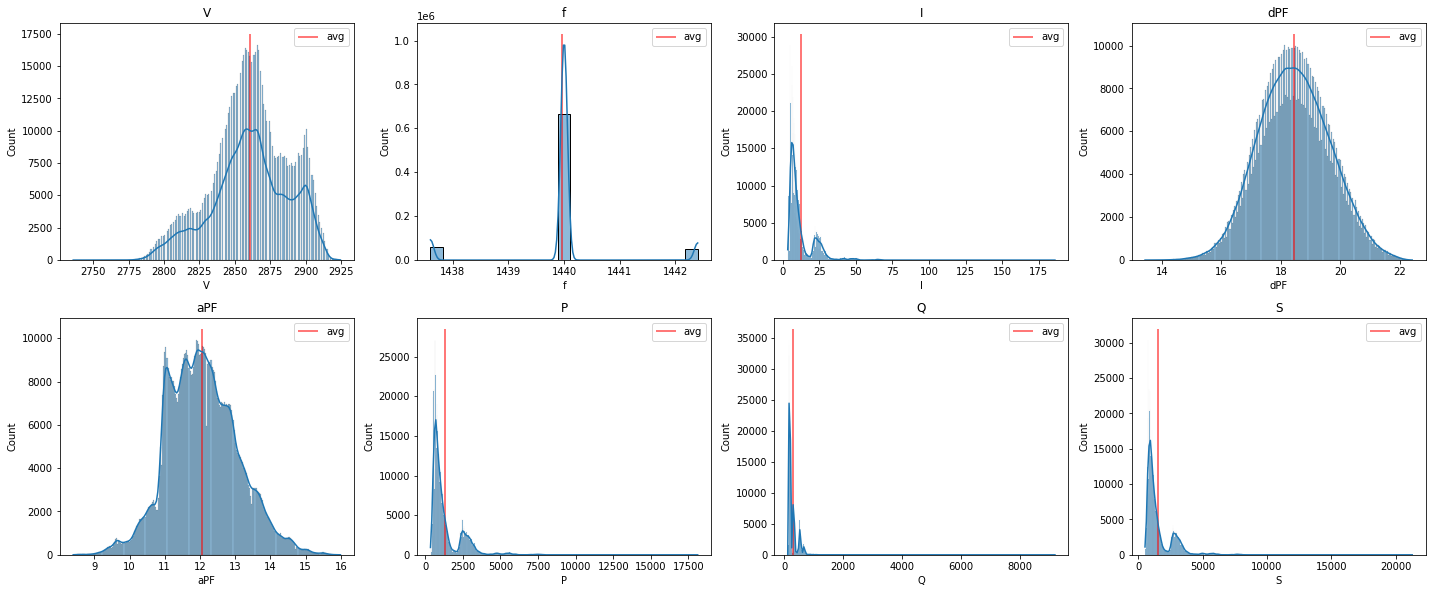

In [10]:
data_aggregated = house1_subs_blk1.groupby('datetime').sum()[columns_graph]
columns_graph = ['V', 'f', 'I', 'dPF', 'aPF', 'P', 'Q', 'S']

# we prepare our plot
fig = plt.figure(figsize=(20, 12));

# for each column
for k, col in enumerate(columns_graph):
    # we add a subplot
    ax = fig.add_subplot(3, 4, k+1)

    # histogramme voltmean_5d et sa moyenne
    sns.histplot(data=data_aggregated, x=col, kde=True, ax=ax)
    ax.vlines(x=data_aggregated[col].mean(), ymin=0, ymax=ax.get_ylim()[-1], color='red', alpha=0.7, label='avg')
    ax.set_title(col)
    ax.legend()

plt.tight_layout()
plt.show();

Nous allons maintenant nous tourner vers le fichier ```house1_tstat_blk1.tab``` afin d'observer les données liées à l'environnement.

In [11]:
house1_tstat_blk1 = pd.read_csv('house1_tstat_blk1.tab', sep='\t')
house1_tstat_blk1.head()

,Date,Time,System Setting,System Mode,Calendar Event,Program Mode,Cool Set Temp (C),Heat Set Temp (C),Current Temp (C),Current Humidity (%RH),...,DM Offset,Thermostat Temperature (C),Thermostat Humidity (%RH),Thermostat Motion,Living Room (C),Living Room Motion,Bedroom (C),Bedroom Motion,Downstairs (C),Downstairs Motion
0,2016-02-07,00:00:00,auto,heatOff,NaN,Sleep,27.0,19.0,19.6,60,...,NaN,20.4,60,0,19.2,0,19.1,0,20.6,0
1,2016-02-07,00:05:00,auto,heatOff,NaN,Sleep,27.0,19.0,19.5,60,...,NaN,20.3,60,0,19.1,0,19.1,0,20.5,0
2,2016-02-07,00:10:00,auto,heatOff,NaN,Sleep,27.0,19.0,19.4,60,...,NaN,20.3,60,0,19.1,0,18.9,0,20.4,0
3,2016-02-07,00:15:00,auto,heatOff,NaN,Sleep,27.0,19.0,19.4,60,...,NaN,20.3,60,0,19.1,0,18.9,0,20.4,0
4,2016-02-07,00:20:00,auto,heatOff,NaN,Sleep,27.0,19.0,19.4,60,...,NaN,20.3,60,0,18.9,0,18.9,0,20.4,0


Nous allons ajouter une colonne ```datetime```.

In [12]:
house1_tstat_blk1['datetime'] = pd.to_datetime(house1_tstat_blk1['Date'] + ' ' + house1_tstat_blk1['Time'])

Quels sont les types de données ?

In [13]:
house1_tstat_blk1.dtypes

Date                                  object
Time                                  object
System Setting                        object
System Mode                           object
Calendar Event                        object
Program Mode                          object
Cool Set Temp (C)                    float64
Heat Set Temp (C)                    float64
Current Temp (C)                     float64
Current Humidity (%RH)                 int64
Outdoor Temp (C)                     float64
Wind Speed (km/h)                    float64
Cool Stage 1 (sec)                     int64
Cool Stage 2 (sec)                     int64
Heat Stage 1 (sec)                     int64
Heat Stage 2 (sec)                     int64
Aux Heat 1 (sec)                       int64
Aux Heat 2 (sec)                       int64
Fan (sec)                              int64
DM Offset                            float64
Thermostat Temperature (C)           float64
Thermostat Humidity (%RH)              int64
Thermostat

Observons l'évolution des colonnes numériques dans le temps.

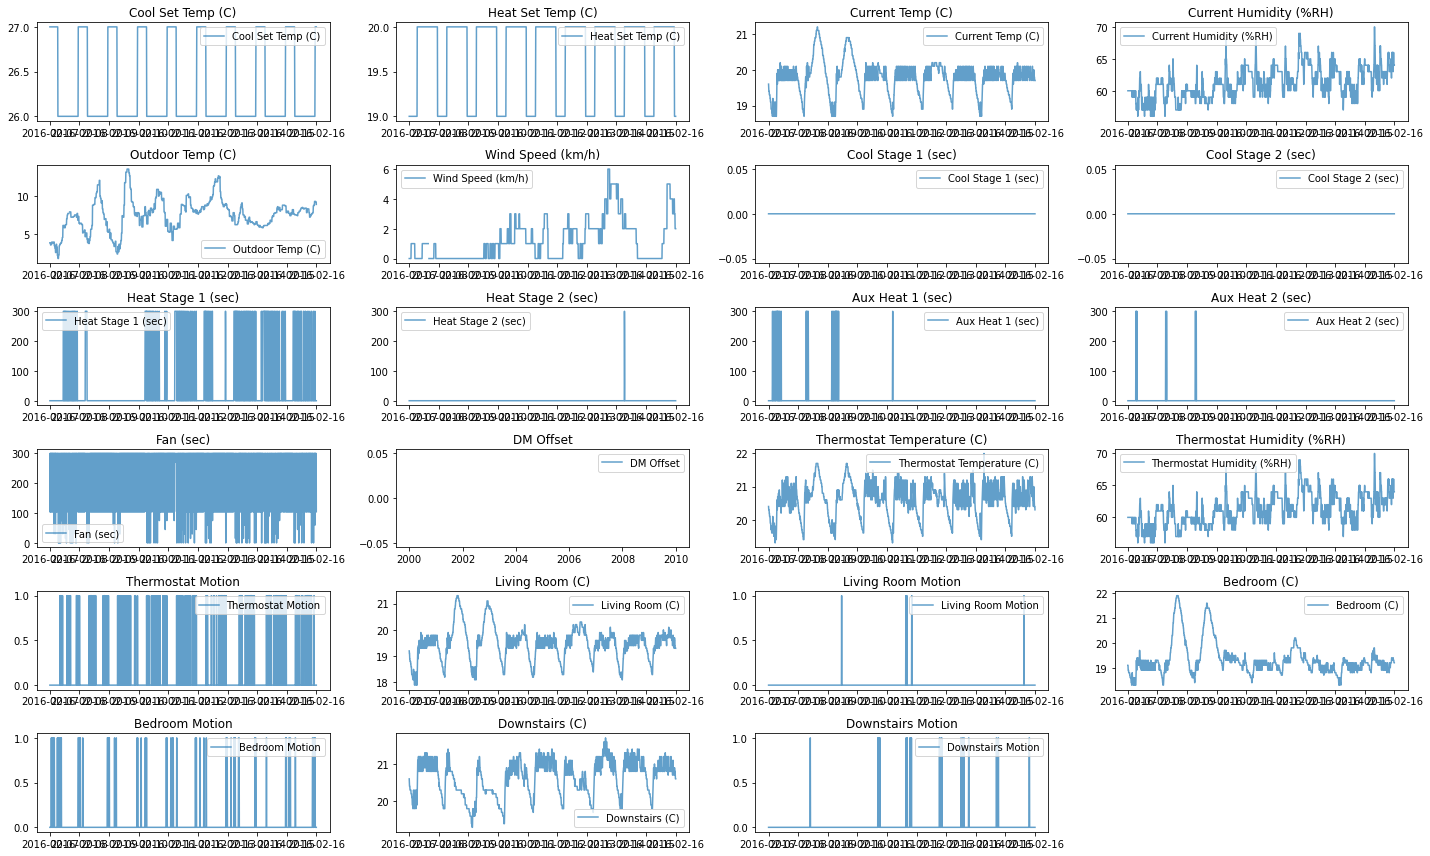

In [14]:
# we prepare our plot
fig = plt.figure(figsize=(20, 12));
fig.autofmt_xdate(rotation=45)

columns_graph = ['Cool Set Temp (C)', 'Heat Set Temp (C)',
       'Current Temp (C)', 'Current Humidity (%RH)', 'Outdoor Temp (C)',
       'Wind Speed (km/h)', 'Cool Stage 1 (sec)', 'Cool Stage 2 (sec)',
       'Heat Stage 1 (sec)', 'Heat Stage 2 (sec)', 'Aux Heat 1 (sec)',
       'Aux Heat 2 (sec)', 'Fan (sec)', 'DM Offset',
       'Thermostat Temperature (C)', 'Thermostat Humidity (%RH)',
       'Thermostat Motion', 'Living Room (C)', 'Living Room Motion',
       'Bedroom (C)', 'Bedroom Motion', 'Downstairs (C)', 'Downstairs Motion']

# for each column
for k, col in enumerate(columns_graph):
    # we add a subplot
    ax = fig.add_subplot(6, 4, k+1)
    # we plot the categories in each subplot
    ax.plot(house1_tstat_blk1['datetime'],
            house1_tstat_blk1[col],
            label = col, alpha=0.7);
    ax.set_title(col);
    #ax.autoscale(axis='x',tight=True);
    ax.legend();
fig.tight_layout()

Les données de type ```Motion``` ont l'air intéressantes pour avoir un aperçu de l'activité. Essayons d'aggréger ces colonne en une seule qui vaut 1 si au moins une de ces colonnes vaut 1 et 0 sinon.

In [15]:
house1_tstat_blk1['motion'] = house1_tstat_blk1[['Thermostat Motion', 'Living Room Motion', 'Bedroom Motion', 'Downstairs Motion']].any(axis=1) * 1

Essayons de tracer les courbes des données ```V```, ```f```, ```I```, ```dPF```, ```aPF```, ```P```, ```Q```, et ```S``` agrégées par heures avec la colonne ```motion```.

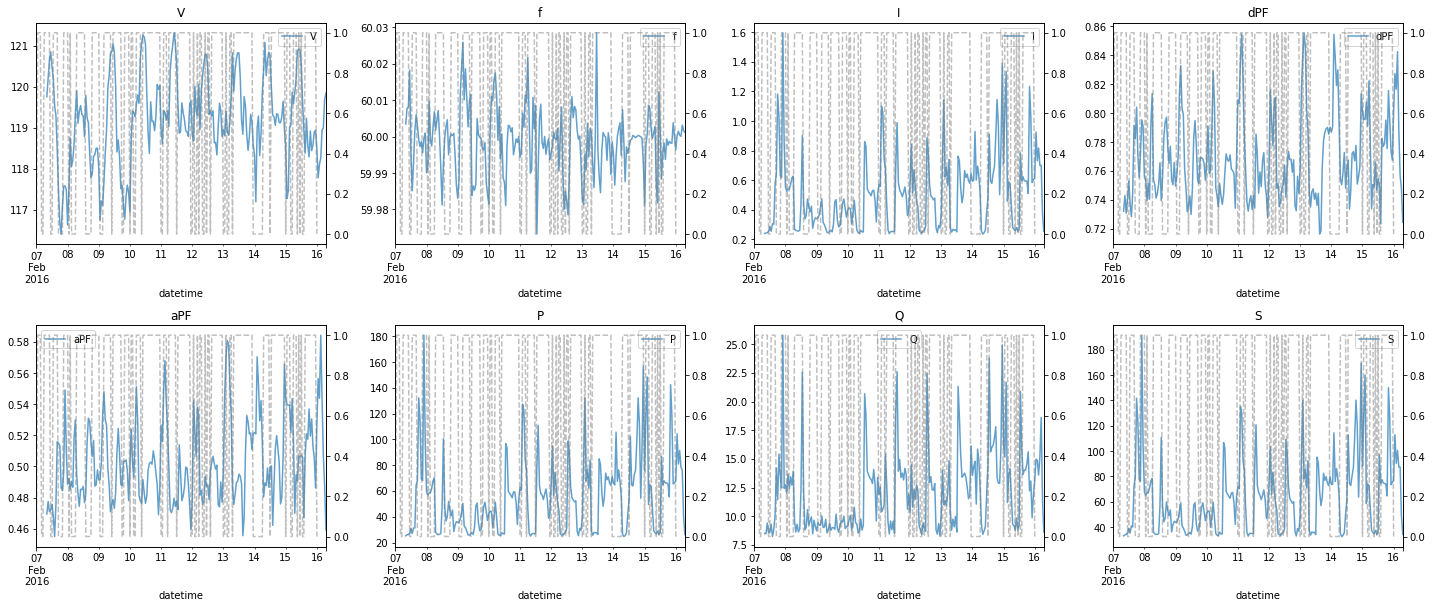

In [38]:
# we prepare our plot
fig = plt.figure(figsize=(20, 12));

columns_graph = ['V', 'f', 'I', 'dPF', 'aPF', 'P', 'Q', 'S']
data_resampled = house1_subs_blk1.resample(rule='H', on='datetime').mean()[columns_graph].interpolate(method='linear')
motion_resampled = house1_tstat_blk1.resample(rule='H', on='datetime').apply(lambda v: v.any()*1)['motion'].interpolate(method='linear')

# for each column
for k, col in enumerate(columns_graph):
    # we add a subplot
    ax = fig.add_subplot(3, 4, k+1)
    # we plot the categories in each subplot
    data_resampled[col].plot(ax=ax, legend = col, alpha=0.7);
    motion_resampled.plot(ax=ax,secondary_y=True, legend = 'motion', kind='line' ,alpha=0.5, linestyle='dashed', color='gray');
    ax.set_title(col);
    #ax.autoscale(axis='x',tight=True);
    ax.legend();
fig.tight_layout()

On se rend qu'il qu'il n'y a pas de corrélation évidente entre les relevés de mesures électriques et les données de type ```Motion```.